In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For regression modeling and diagnostics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

# For normality test
from scipy.stats import shapiro

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

In [2]:
# 1. Load the Dataset
financial_data = pd.read_csv("2018_Financial_Data.csv", na_values = ["NA", "na", "?"])
financial_data.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2019 PRICE VAR [%]', 'Class'],
      dtype='object', length=225)

In [3]:
financial_data.columns = financial_data.columns.str.lower()

# Define the selected columns with correct names from the dataset
column_mapping = {
    "revenue growth": "revenue growth",
    "dividend per share": "dividend per share",
    "profit margin": "profit margin",
    "return on equity": "roe",
    "free cash flow": "free cash flow",
    "asset growth": "asset growth",
    "debt growth": "debt growth",
    "r&d expenses": "r&d expenses",
    "net income per share": "net income per share",
    "pe ratio": "pe ratio"
}

financial_data = financial_data[list(column_mapping.values())]

In [4]:
financial_data = financial_data.dropna()
financial_data.info()
financial_data

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 0 to 4391
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   revenue growth        3998 non-null   float64
 1   dividend per share    3998 non-null   float64
 2   profit margin         3998 non-null   float64
 3   roe                   3998 non-null   float64
 4   free cash flow        3998 non-null   float64
 5   asset growth          3998 non-null   float64
 6   debt growth           3998 non-null   float64
 7   r&d expenses          3998 non-null   float64
 8   net income per share  3998 non-null   float64
 9   pe ratio              3998 non-null   float64
dtypes: float64(10)
memory usage: 343.6 KB


,revenue growth,dividend per share,profit margin,roe,free cash flow,asset growth,debt growth,r&d expenses,net income per share,pe ratio
0,0.1115,0.917,0.124,0.1638,1.198500e+10,0.3426,0.7309,0.000000e+00,2.5785,13.3008
1,0.0320,0.725,0.105,0.0478,2.119000e+09,-0.0024,-0.0137,0.000000e+00,0.7261,23.3030
2,0.1289,1.200,0.297,0.2824,1.425100e+10,0.0382,-0.0169,1.354300e+10,4.5658,10.2691
3,0.4955,0.000,0.465,0.4377,8.521000e+09,0.2275,-0.5841,2.141000e+09,12.2700,4.2999
4,0.0285,0.370,-0.187,-0.7216,7.090000e+08,-0.1575,-0.2297,0.000000e+00,-2.5701,0.0000
...,...,...,...,...,...,...,...,...,...,...
4385,0.1186,0.000,0.031,0.0109,5.117000e+06,0.0225,-0.2154,0.000000e+00,0.0595,18.8333
4387,0.0000,0.000,-1.231,-0.0800,-6.290432e+06,-0.0508,-0.0152,0.000000e+00,-0.0796,0.0000
4388,-0.4110,0.000,-16.493,-1.6093,-8.796000e+06,-0.2323,0.0000,4.759000e+06,-0.9232,0.0000
4389,0.2210,0.000,0.128,0.1895,-2.702133e+06,0.2489,-0.0968,1.652633e+06,0.5157,6.1538


In [ ]:
# 2. Exploratory Data Analysis (Optional)
sampled_data = financial_data[['revenue growth', 'dividend per share', 'roe', 'net income per share']].sample(1000)
sns.pairplot(sampled_data)
plt.show()

In [16]:
# 3. Fit a Multiple Linear Regression Model
X = financial_data.drop('pe ratio', axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8162
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.601
Time:                        15:46:59   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.874e+04
Df Residuals:                    3988   BIC:                         4.880e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const           

In [7]:
X = financial_data.drop(['pe ratio', 'roe'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9162
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.502
Time:                        15:29:13   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.874e+04
Df Residuals:                    3989   BIC:                         4.879e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const           

In [8]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.041
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.400
Time:                        15:29:20   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.874e+04
Df Residuals:                    3990   BIC:                         4.879e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const           

In [9]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth', 'revenue growth'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.206
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.300
Time:                        15:29:24   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.873e+04
Df Residuals:                    3991   BIC:                         4.878e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const           

In [10]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth', 'revenue growth', 'net income per share'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.431
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.210
Time:                        15:29:29   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.873e+04
Df Residuals:                    3992   BIC:                         4.877e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               

In [11]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth', 'revenue growth', 'net income per share', 'dividend per share'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.763
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.133
Time:                        15:29:35   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.873e+04
Df Residuals:                    3993   BIC:                         4.876e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.2293   

In [12]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth', 'revenue growth', 'net income per share', 'dividend per share', 'asset growth'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.259
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0795
Time:                        15:30:14   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.873e+04
Df Residuals:                    3994   BIC:                         4.875e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0737   

In [13]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth', 'revenue growth', 'net income per share', 'dividend per share', 'asset growth', 'profit margin'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.119
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0443
Time:                        15:30:39   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.873e+04
Df Residuals:                    3995   BIC:                         4.875e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0080   

In [14]:
X = financial_data.drop(['pe ratio', 'roe', 'debt growth', 'revenue growth', 'net income per share', 'dividend per share', 'asset growth', 'profit margin', 'free cash flow'], axis=1)
X = sm.add_constant(X)
y = financial_data['pe ratio']

model = sm.OLS(y, X).fit()
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:               pe ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.894
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0152
Time:                        15:31:12   Log-Likelihood:                -24360.
No. Observations:                3998   AIC:                         4.872e+04
Df Residuals:                    3996   BIC:                         4.874e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.1350      1.7

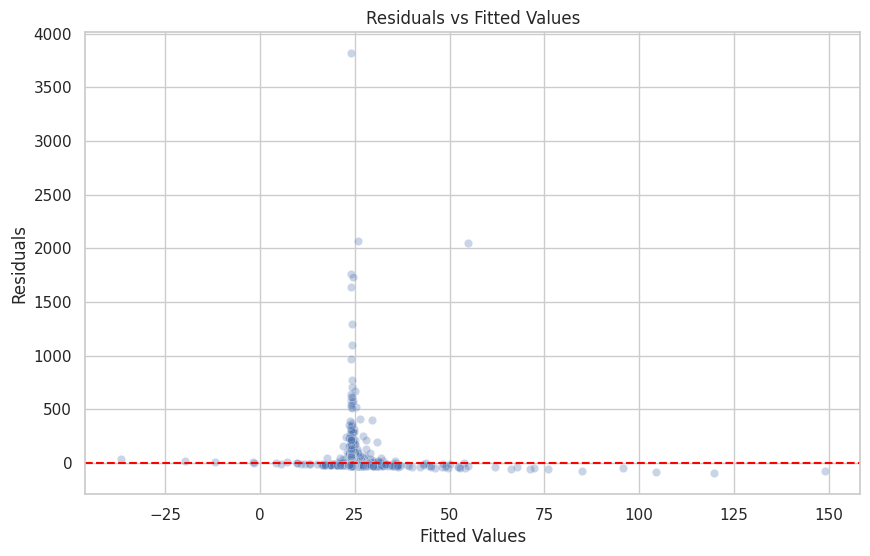

In [17]:
# 4. Regression Diagnostics

# 4.1. Linearity and Homoscedasticity: Residuals vs Fitted
fitted_vals = model.predict(X)
residuals = y - fitted_vals

plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [18]:
# 4.2. Independence: Durbin-Watson Test
dw = durbin_watson(residuals)
print(f'\nDurbin-Watson statistic: {dw}')


Durbin-Watson statistic: 2.0135344988224158


In [19]:
# 4.3. Homoscedasticity: Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(labels, bp_test))
print('\nBreusch-Pagan test results:')
for key in bp_results:
    print(f'{key}: {bp_results[key]}')


Breusch-Pagan test results:
Lagrange multiplier statistic: 3.1278298550585735
p-value: 0.9590103667662708
f-value: 0.3469388013962923
f p-value: 0.9591764700385568


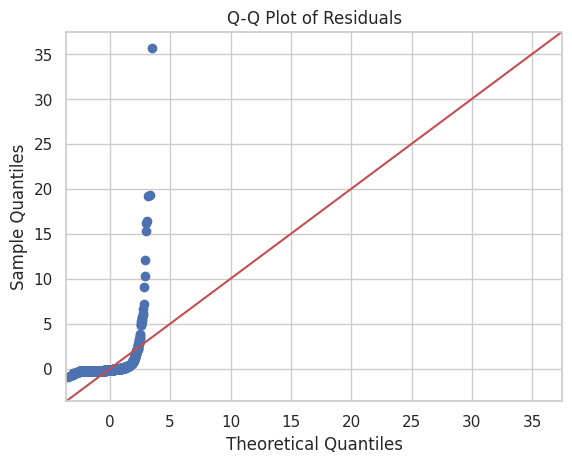


Shapiro-Wilk test statistic: 0.15573657303194122, p-value: 4.131937183890597e-86


In [21]:
# 4.4. Normality of Errors: Q-Q Plot and Shapiro-Wilk Test
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Due to large sample size, sample for Shapiro-Wilk
shapiro_test = shapiro(residuals)
print(f'\nShapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

In [22]:
# 4.5. No Multicollinearity: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print('\nVariance Inflation Factor (VIF) for each feature:')
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
                Feature       VIF
0                 const  1.248814
1        revenue growth  1.000882
2    dividend per share  1.019242
3         profit margin  1.001146
4                   roe  1.000654
5        free cash flow  1.204401
6          asset growth  1.004292
7           debt growth  1.000031
8          r&d expenses  1.189072
9  net income per share  1.000252
